# Content/Goals/Purpose:

 - Familiarize with RDKit
 - For one structure, finding the most similar structures from a database
 - For many structures, finding the most similar structures and saving results to files.

## Example data and databases: 
MIBiG v3.1 (full database);                N_SMs~ 2848, N_BGCs=1896, N_entries=3158    
MIBiG v3.1 fungal (fungal BGCs & SMs only);N_SMs~ 637 , N_BGCs=377 , N_entries=692    
MIBiG v4 (full database);                  N_SMs~ 4040, N_BGCs=2387, N_entries=4401    
MIBiG v4 fungal (fungal BGCs & SMs only);  N_SMs~ 1009, N_BGCs=538 , N_entries=1092        

There can be discrepancies between these numbers and published numbers. Here, we count the subset of BGCs having defied SM SMILES in their entries

You will need to install the libraries RDkit, pandas, matplotlib and scipy. I want this tutorial to be as approachable as possible so I kept the code as if I was running it on my own computer. You, in turn, have to adjust the paths to where you keep the files and want the ouput to be saved on your computer.

Any line starting with a '#' is a comment, i.e. it will not be interpreted as python code. If it looks like code, you can remove the '#' and see what happens.

In [33]:
# Let's first look at the databases and check some basics

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
import pandas as pd


file_path ='/Users/karin/Documents/A_fischeri/GitHub/data/MIBiGv4.0_SMILES_BGC_acc-names-FUNGAL-only.tsv' # this my file path, you need to put yours

df = pd.read_csv(file_path, sep='\t', header=None, names=['SMILES', 'Name'])
df
#print(df.head())

,SMILES,Name
0,CCC(C)C(C(=O)OC(/C=C/C=C/C=C/C(=O)O)C1(CO1)C)O...,BGC0000003_MIBiGv4.0_AF-toxin
1,COC1=C2C3=C(C(=O)OCC3)C(=O)OC2=C4[C@H]5C=CO[C@...,BGC0000004_MIBiGv4.0_aflatoxin G1
2,COC1=C2C3=C(C(=O)OCC3)C(=O)OC2=C4C5C=COC5OC4=C1,BGC0000005_MIBiGv4.0_aflatoxin
3,COc1cc2c(c3oc(=O)c4c(c13)CCC4=O)[C@@H]1C=CO[C@...,BGC0000006_MIBiGv4.0_aflatoxin B1
4,COc1cc2c(c3c1c4c(c(=O)o3)C(=O)CC4)[C@@H]5CCO[C...,BGC0000006_MIBiGv4.0_aflatoxin B2
...,...,...
1087,C[C@]12CC[C@H]3[C@@]4([C@@]1(CC[C@@H]5[C@@]2(C...,BGC0003163_MIBiGv4.0_Terpendole I
1088,CC(=CCOC(C)(C)[C@@H]1[C@H]([C@@H]2[C@@]3(O2)[C...,BGC0003163_MIBiGv4.0_Terpendole J
1089,CC(=C[C@H]1O[C@H]2[C@@H]3[C@@]4(O3)C(=CC[C@]5(...,BGC0003163_MIBiGv4.0_Terpendole K
1090,CC(=C[C@H]1O[C@H]2[C@@H]3[C@@]4(O3)[C@H](CC[C@...,BGC0003163_MIBiGv4.0_Terpendole M


In [36]:
# Check SMILES
# Assuming df is your DataFrame with 'SMILES' column
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Check for invalid SMILES
invalid_smiles = df[df['Molecule'].isnull()]

# Display invalid SMILES, if any
print("Invalid SMILES:")
print(invalid_smiles[['SMILES', 'Name']])

# If all structures are okay, this should return several lines, one of which says "Empty DataFrame", as all SMILES are valid.

Invalid SMILES:
Empty DataFrame
Columns: [SMILES, Name]
Index: []


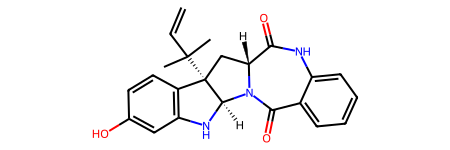

In [37]:
# Draw any structure; e.g. 4-hydroxyaszonalenin
SM=Chem.MolFromSmiles("O=C(N1[C@@]([H])2C[C@]3([C@@]1(NC4=C3C=CC(O)=C4)[H])C(C)(C)C=C)C5=CC=CC=C5NC2=O") 
SM

BGC0000003_MIBiGv4.0_AF-toxin


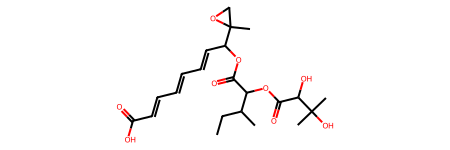

In [38]:
# Draw a structures in your df
smiles = df.loc[0, "SMILES"]   # Select the first SMILES string from the "SMILES" column
print(df.loc[0, "Name"])       # What is this moelcule?
mol = Chem.MolFromSmiles(smiles)
mol

In [31]:
# Draw all structures in your df
#for idx, row in df.iterrows():
#    smiles = row['SMILES']
#    name = row['Name']
#    mol = Chem.MolFromSmiles(smiles)
#    img = Draw.MolToImage(mol, size=(200, 200))
#    display(img)
#    print(f"Molecule: {name}")

In [39]:
# Let's add our experimental structure to one of the data frames

# New entry as a DataFrame
new_entry = pd.DataFrame({
    "SMILES": ["O=C(N1[C@@]([H])2C[C@]3([C@@]1(NC4=C3C=CC(O)=C4)[H])C(C)(C)C=C)C5=CC=CC=C5NC2=O"], 
    "Name": ["4-hydroxyaszonalenin"]})

# Append the new compound we're interested in comparing to the full data base
df = pd.concat([df, new_entry], ignore_index=True)
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)
df
# You see it shows up at the last line of the table

,SMILES,Name,Molecule
0,CCC(C)C(C(=O)OC(/C=C/C=C/C=C/C(=O)O)C1(CO1)C)O...,BGC0000003_MIBiGv4.0_AF-toxin,<rdkit.Chem.rdchem.Mol object at 0x14ba30c80>
1,COC1=C2C3=C(C(=O)OCC3)C(=O)OC2=C4[C@H]5C=CO[C@...,BGC0000004_MIBiGv4.0_aflatoxin G1,<rdkit.Chem.rdchem.Mol object at 0x14ba30c10>
2,COC1=C2C3=C(C(=O)OCC3)C(=O)OC2=C4C5C=COC5OC4=C1,BGC0000005_MIBiGv4.0_aflatoxin,<rdkit.Chem.rdchem.Mol object at 0x15afd6880>
3,COc1cc2c(c3oc(=O)c4c(c13)CCC4=O)[C@@H]1C=CO[C@...,BGC0000006_MIBiGv4.0_aflatoxin B1,<rdkit.Chem.rdchem.Mol object at 0x15afd6650>
4,COc1cc2c(c3c1c4c(c(=O)o3)C(=O)CC4)[C@@H]5CCO[C...,BGC0000006_MIBiGv4.0_aflatoxin B2,<rdkit.Chem.rdchem.Mol object at 0x15afd65e0>
...,...,...,...
1088,CC(=CCOC(C)(C)[C@@H]1[C@H]([C@@H]2[C@@]3(O2)[C...,BGC0003163_MIBiGv4.0_Terpendole J,<rdkit.Chem.rdchem.Mol object at 0x15af85150>
1089,CC(=C[C@H]1O[C@H]2[C@@H]3[C@@]4(O3)C(=CC[C@]5(...,BGC0003163_MIBiGv4.0_Terpendole K,<rdkit.Chem.rdchem.Mol object at 0x15af850e0>
1090,CC(=C[C@H]1O[C@H]2[C@@H]3[C@@]4(O3)[C@H](CC[C@...,BGC0003163_MIBiGv4.0_Terpendole M,<rdkit.Chem.rdchem.Mol object at 0x15af85070>
1091,CC(C)=C[C@@H]1O[C@H]2[C@@H](O[C@@H]3CC[C@]4(C)...,BGC0003163_MIBiGv4.0_Terpendole N,<rdkit.Chem.rdchem.Mol object at 0x15af85000>


## Structure similarity clustering requires 3 steps

1. Calculate Molecular Fingerprints for each compound
2. Calculate Tanimoto Similarity Matrix
3. Hierarchical Clustering

In [40]:
# 1. Calculate Molecular Fingerprints

from rdkit.Chem import AllChem

# Add a new column for fingerprints
df['Fingerprint'] = df['SMILES'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(
        Chem.MolFromSmiles(x), 
        radius=2, 
        nBits=2048,
        useChirality=False  # Enable chirality with 'True', or toggle off with 'False'
    )
)


# Convert fingerprints to binary strings
df['Fingerprint'] = df['Fingerprint'].apply(lambda x: x.ToBitString())

In [41]:
# What does a 'finderprint' look like? 
fp = df.loc[1092, "Fingerprint"] # fingerprint for the last entry in the dataframe df
fp

# each position codes for presence=1 or absence=0 of a particular substructure

'000000010000000000000000000000000000010000000000000000000000000000000000000000000000100000000000000000000000000000100000100000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010010000000001000010000000000000000000000000000000010000000000000000000000000000100000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000010000000000000000000000000000000000000000001000000000010000000000000000010000000000000010000000000001000000000000000000000000000000000000010000000000000000000000000000000000000000000000010000000000000100000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000000000000100000000000000

In [43]:
# 2. Calculate Tanimoto Similarity Matrix
# This may take a minute or two

from rdkit import DataStructs

# Create a function to calculate Tanimoto similarity
def calculate_tanimoto(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Create a similarity matrix
similarity_matrix = []

for i in range(len(df)):
    row_similarities = []
    for j in range(len(df)):
        fp1 = DataStructs.CreateFromBitString(df.iloc[i]['Fingerprint'])
        fp2 = DataStructs.CreateFromBitString(df.iloc[j]['Fingerprint'])
        similarity = calculate_tanimoto(fp1, fp2)
        row_similarities.append(similarity)
    similarity_matrix.append(row_similarities)

In [44]:
# What does this data matrix look like?
similarity_df=pd.DataFrame(similarity_matrix)
#similarity_df.iloc[:, 0] # first column
similarity_df.iloc[:, 1092] # last column

0       0.080000
1       0.090909
2       0.090909
3       0.082474
4       0.082474
          ...   
1088    0.123894
1089    0.115044
1090    0.127273
1091    0.153153
1092    1.000000
Name: 1092, Length: 1093, dtype: float64

In [45]:
#Let's set row and column names for convenience
similarity_df.columns = df["Name"]  # Set columns names
similarity_df.index = df["Name"]    # Set row names

# Which compounds is "our compound" most similar to?
row_values = similarity_df.iloc[1092] # our compound is stored in the last column
top_5 = row_values.nlargest(5)
print(top_5)
# If you want to save the table, use the code below
#similarity_df.to_csv("/User/Path/to/where/you/want/to/save/filename.csv", index=True, header=True)

Name
4-hydroxyaszonalenin                      1.000000
BGC0000293_MIBiGv4.0_acetylaszonalenin    0.577465
BGC0002272_MIBiGv4.0_epi-aszonalenin A    0.577465
BGC0000420_MIBiGv4.0_roquefortine C       0.546667
BGC0000420_MIBiGv4.0_roquefortine D       0.481013
Name: 4-hydroxyaszonalenin, dtype: float64


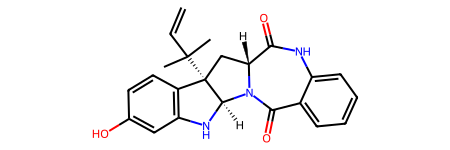

In [69]:
#4-hydroxyaszonalenin
SM=Chem.MolFromSmiles("O=C(N1[C@@]([H])2C[C@]3([C@@]1(NC4=C3C=CC(O)=C4)[H])C(C)(C)C=C)C5=CC=CC=C5NC2=O") 
SM

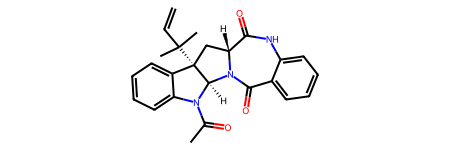

In [47]:
# How similar is the best match?
# Getting the SMILES for BGC0000293_MIBiGv4.0_acetylaszonalenin
smiles_value = df.loc[df["Name"] == "BGC0000293_MIBiGv4.0_acetylaszonalenin", "SMILES"].iloc[0]

# Converting to molecule
SM2 = Chem.MolFromSmiles(smiles_value)  
SM2
# For visual comparison of the structures

In [ ]:
# 3. Hierarchical Clustering

# The code above gives you the most similar compounds given the database you selected in the beginning and 
# similarity metric used for comparing structures. When assessing several structures, this clustring can be
# useful as it helps you to detect groups of similar compounds which might be produced by the same BGC.

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
cluster_data = linkage(similarity_matrix, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 400))
dendrogram(cluster_data, labels=df['Name'].tolist(), orientation='right', leaf_font_size=10)
plt.title('Molecule Clustering based on Tanimoto Similarity')

# If you want to save the plot, use the coed below
#plt.savefig('/User/Path/to/where/you/want/to/save/mibig4_tutorial_clustering.pdf', format='pdf', bbox_inches='tight')
plt.show()


For larger sets of SMILES, instead of manually appending them with python, I just generated a new data frame combining the database I wanted to use and then pasting my SMILES and Names.

# Analyze larger sets of data at once

Subsequently, I outline code to do these analyses on a larger scale, with the experimental data from the publication.

In [61]:
file_path ='/Users/karin/Documents/A_fischeri/GitHub/data/MIBiGv3.1_SMILES_BGC_acc-names.tsv' # this my file path, you need to put yours
df = pd.read_csv(file_path, sep='\t', header=None, names=['SMILES', 'Name']) # # 3158 rows × 2 columns

experimental_path = '/Users/karin/Documents/A_fischeri/GitHub/data/experimentally_identified_metabolites.tsv' # this my file path, you need to put yours
experimental_df = pd.read_csv(experimental_path, sep='\t', header=None, names=['SMILES', 'Name'])
experimental_df # 75 rows × 2 columns

,SMILES,Name
0,CC(C)[C@@H](C)/C=C/[C@@H](C)[C@@]1([H])CCC2=C3...,"chem_(3β,22E)-Ergosta-4,6,8(14),22-tetraene-3-ol"
1,C/C(C)=C\CO[C@H]1C2=C(N(C3=C2C=CC(OC)=C3)C/C=C...,chem_13-O-prenylfumitremorgin B
2,C/C(C)=C/CCC1=C2[C@](OC1=O)([H])C[C@]3(C)C4C([...,"chem_16-O-deacetyl helvolic acid 21,16-lactone"
3,O=C(C1=CC=CC=C1N2)N3[C@@](C[C@@]4(C(C=C)(C)C)[...,chem_4-Hydroxyaszonalenin
4,OC1=CC=C(C2=C3C(C(C4=C(O)CC(C)C(O)C4(C(OC)=O)O...,"chem_4,4'-Secalonic acid E"
...,...,...
70,O=C([C@@](CC1=CN(C/C=C(C)\C)C2=C1C=CC=C2)([H])...,chem_Trihistatin
71,CC(=CCC1=C(C2=CC=CC=C2N1)C[C@H]3C(=O)N4CCC[C@H...,chem_Tryprostatin B
72,COC1=CC=C2C(NC(/C=C\C(C)=O)=C2C[C@@]3([H])C(N(...,chem_Tryprostatin C
73,COC1=CC=C2C(NC(/C=C/C(C)=O)=C2C[C@@]3([H])C(N(...,chem_Tryprostatin D


In [62]:
# Append the experimental data frame to the original database
df = pd.concat([df, experimental_df], ignore_index=True)
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles)
df # 3233 rows × 3 columns
# I'm getting some warnings about putatively wrong SMILES here, but we can continue

[10:53:39] Conflicting single bond directions around double bond at index 26.
[10:53:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:53:40] WARNING: not removing hydrogen atom without neighbors
[10:53:40] WARNING: not removing hydrogen atom without neighbors
[10:53:40] WARNING: not removing hydrogen atom without neighbors
[10:53:40] WARNING: not removing hydrogen atom without neighbors


,SMILES,Name,Molecule
0,CC1C[C@]23OC(=O)C4=C2OC1C(O)C3\C=C/C(=O)[C@@H]...,BGC0000001_MIBiGv3.1_abyssomicin C,<rdkit.Chem.rdchem.Mol object at 0x31be73450>
1,CC1CC23OC(=O)C4=C2OC1C(O)C3\C=C/C(=O)C(C)CC(C)...,BGC0000001_MIBiGv3.1_atrop-abyssomicin C,<rdkit.Chem.rdchem.Mol object at 0x31be73140>
2,CCCC(O[C@H]1C[C@](C)(N)[C@H](O)[C@H](C)O1)C(C)...,BGC0000002_MIBiGv3.1_aculeximycin,<rdkit.Chem.rdchem.Mol object at 0x31be73060>
3,CCC(C)C(C(=O)OC(/C=C/C=C/C=C/C(=O)O)C1(CO1)C)O...,BGC0000003_MIBiGv3.1_AF-toxin,<rdkit.Chem.rdchem.Mol object at 0x31be73300>
4,[H][C@@]12OC=C[C@]1([H])C1=C(O2)C=C(OC)C2=C1OC...,BGC0000004_MIBiGv3.1_aflatoxin G1,<rdkit.Chem.rdchem.Mol object at 0x3112490e0>
...,...,...,...
3228,O=C([C@@](CC1=CN(C/C=C(C)\C)C2=C1C=CC=C2)([H])...,chem_Trihistatin,<rdkit.Chem.rdchem.Mol object at 0x31bef0f20>
3229,CC(=CCC1=C(C2=CC=CC=C2N1)C[C@H]3C(=O)N4CCC[C@H...,chem_Tryprostatin B,<rdkit.Chem.rdchem.Mol object at 0x31bef0f90>
3230,COC1=CC=C2C(NC(/C=C\C(C)=O)=C2C[C@@]3([H])C(N(...,chem_Tryprostatin C,<rdkit.Chem.rdchem.Mol object at 0x31bef1000>
3231,COC1=CC=C2C(NC(/C=C/C(C)=O)=C2C[C@@]3([H])C(N(...,chem_Tryprostatin D,<rdkit.Chem.rdchem.Mol object at 0x31bef1070>


In [63]:
# Check SMILES
# Assuming df is your DataFrame with 'SMILES' column
df['Molecule'] = df['SMILES'].apply(Chem.MolFromSmiles) # no need for Chem.MolFromSmiles(r'') here

# Check for invalid SMILES
invalid_smiles = df[df['Molecule'].isnull()]

# Display invalid SMILES, if any
print("Invalid SMILES:")
print(invalid_smiles[['SMILES', 'Name']])

Invalid SMILES:
Empty DataFrame
Columns: [SMILES, Name]
Index: []


[10:54:45] Conflicting single bond directions around double bond at index 26.
[10:54:45]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:54:45] WARNING: not removing hydrogen atom without neighbors
[10:54:45] WARNING: not removing hydrogen atom without neighbors
[10:54:45] WARNING: not removing hydrogen atom without neighbors
[10:54:45] WARNING: not removing hydrogen atom without neighbors


In [64]:
# Running all code on a larger set of molecules take a bit of time, ca 10 mins

# 1. Calculate Molecular Fingerprints
from rdkit.Chem import AllChem

# Add a new column for fingerprints
df['Fingerprint'] = df['SMILES'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(
        Chem.MolFromSmiles(x), 
        radius=2, 
        nBits=2048,
        useChirality=False
    )
)

# Convert fingerprints to binary strings
df['Fingerprint'] = df['Fingerprint'].apply(lambda x: x.ToBitString())


# 2. Calculate Tanimoto Similarity Matrix
from rdkit import DataStructs

# Create a function to calculate Tanimoto similarity
def calculate_tanimoto(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Create a similarity matrix
similarity_matrix = []

for i in range(len(df)):
    row_similarities = []
    for j in range(len(df)):
        fp1 = DataStructs.CreateFromBitString(df.iloc[i]['Fingerprint'])
        fp2 = DataStructs.CreateFromBitString(df.iloc[j]['Fingerprint'])
        similarity = calculate_tanimoto(fp1, fp2)
        row_similarities.append(similarity)
    similarity_matrix.append(row_similarities)

# 3. Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
cluster_data = linkage(similarity_matrix, method='average', metric='euclidean')


[11:22:09] Conflicting single bond directions around double bond at index 26.
[11:22:09]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:22:09] WARNING: not removing hydrogen atom without neighbors
[11:22:09] WARNING: not removing hydrogen atom without neighbors
[11:22:09] WARNING: not removing hydrogen atom without neighbors
[11:22:09] WARNING: not removing hydrogen atom without neighbors


In [ ]:
# Plot dendrogram
plt.figure(figsize=(12, 450))
dendrogram(cluster_data, labels=df['Name'].tolist(), orientation='right', leaf_font_size=10)
plt.title('Molecule Clustering based on Tanimoto Similarity')
# If you want to save the resulting plot as pdf:
#plt.savefig('/User/Path/to/where/you/want/to/save/mibig4_tutorial_clustering_full.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [67]:
# Extracting the Tanimoto similarities for furhter custom analyses
# as this is an all-vs-all comparison, every pairs is listed twice in the matrix (A-B and B-A comparison), 
# as well as the self-comparisons. This code mpodifys the matrix to only contain every pair once and remove self-comparisons.

similarity_df=pd.DataFrame(similarity_matrix)
similarity_df.columns = df["Name"]  # Set column names
similarity_df.index = df["Name"]    # Set row names
# If you want to save the full matrix at this point, you can do so:
#similarity_df.to_csv("/User/Path/to/where/you/want/to/save/MIBiGv3.1_complete_SMILES.similarity_df.csv", index=True, header=True)


# mask half the symmetric matrix to avoid duplicate entries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove the index and column name to avoid conflicts
similarity_df.index.name = None
similarity_df.columns.name = None

# Create a mask for the lower triangle of the matrix (including the diagonal)
mask = np.tril(np.ones_like(similarity_df, dtype=bool)) #tril/triu= triangle lower/upper

# Apply the mask to the dataframe to keep only the lower triangle; convert to long format
df_long = similarity_df.where(mask).stack().reset_index()
df_long.columns = ['BGC1', 'BGC2', 'Similarity']  # Renaming columns explicitly

# Remove self-comparisons (diagonal)
df_long = df_long[df_long['BGC1'] != df_long['BGC2']]
df_long.head()

# If you want to save the Tanimoto similarity table at this point, you can do so:
#df_long.to_csv("/User/Path/to/where/you/want/to/save/MIBiGv3.1_complete_SMILES.reduced-Tanimoto-similarity_df.csv", index=True, header=True)

,BGC1,BGC2,Similarity
1,BGC0000001_MIBiGv3.1_atrop-abyssomicin C,BGC0000001_MIBiGv3.1_abyssomicin C,1.000000
3,BGC0000002_MIBiGv3.1_aculeximycin,BGC0000001_MIBiGv3.1_abyssomicin C,0.125786
4,BGC0000002_MIBiGv3.1_aculeximycin,BGC0000001_MIBiGv3.1_atrop-abyssomicin C,0.125786
6,BGC0000003_MIBiGv3.1_AF-toxin,BGC0000001_MIBiGv3.1_abyssomicin C,0.065217
7,BGC0000003_MIBiGv3.1_AF-toxin,BGC0000001_MIBiGv3.1_atrop-abyssomicin C,0.065217


In [68]:
# Quick check of the results by looking for the top results for each compound in the "experiment_SMs" list
experimental_SMs=["chem_(3β,22E)-Ergosta-4,6,8(14),22-tetraene-3-ol", "chem_13-O-prenylfumitremorgin B", "chem_16-O-deacetyl helvolic acid 21,16-lactone", "chem_4-Hydroxyaszonalenin", "chem_4,4'-Secalonic acid E", "chem_Acetylaszonalenin", "chem_Aszonalenin", "chem_Azonapyrone A", "chem_Betaenone E", "chem_Betaenone G", "chem_Betaenone H", "chem_Betaenone I", "chem_Betaenone J", "chem_Bisdethiobis(methylthio)gliotoxin", "chem_Brevianamide A", "chem_Brevianamide B", "chem_Brevianamide C", "chem_Brevianamide D", "chem_Brevianamide E", "chem_Brevianamide F ", "chem_Brevianamide K", "chem_Brevianamide L", "chem_Brevianamide O", "chem_Brevianamide P", "chem_Brevianamide Q", "chem_Brevianamide R", "chem_Brevianamide T", "chem_Brevianamide U", "chem_Brevianamide V", "chem_Brevianamide W", "chem_Chaetoglobosin 542", "chem_Circumdatin C", "chem_Clavaric acid", "chem_Cottoquinazoline E", "chem_Cottoquinazoline F", "chem_Cottoquinazoline G", "chem_Deoxybrevianamide E", "chem_Dimetoxycircumdatin C", "chem_Fumagillol", "chem_Fumitremorgin A", "chem_Fumitremorgin B", "chem_Fumitremorgin C", "chem_Fumitremorgin F", "chem_Fumitremorgin G", "chem_Fumitremorgin L", "chem_Gliotoxin", "chem_Helvolic acid", "chem_hexadehydroastechrome monomer", "chem_Ilicicolin E", "chem_Isoroquefortine C ", "chem_Neosartoricin", "chem_Neosartoricin C", "chem_Neosartoricin D", "chem_Neosartorin", "chem_Nidiascin C", "chem_Pyripyropene F", "chem_Pyripyropene H", "chem_Pyripyropene I", "chem_Pyripyropene O", "chem_Roquefortine C", "chem_Sartorypyrone A", "chem_Secalonic acid A", "chem_Secalonic acid B", "chem_Secalonic acid C", "chem_Secalonic acid D", "chem_Secalonic acid E", "chem_Secalonic acid F", "chem_Secalonic acid F1", "chem_Secalonic acid G", "chem_spiro[5H,10H-dipyrrolo-[1,2-a:1′,2′-d]pyrazine-2-(3H),2′-[2H]-indole]-3′,5,10(1′H)trione", "chem_Trihistatin", "chem_Tryprostatin B", "chem_Tryprostatin C", "chem_Tryprostatin D", "chem_Verruculogen"]


for col in experimental_SMs:
    if col in similarity_df.columns:  # Ensure column exists
        top_values = similarity_df[col].nlargest(3)  # Get top 3 largest values
        print(f"Top 3 values for {col}:")
        print(top_values, "\n")  # Display the values along with the index
    else:
        print(f"Column {col} not found in DataFrame.\n")

Top 3 values for chem_(3β,22E)-Ergosta-4,6,8(14),22-tetraene-3-ol:
chem_(3β,22E)-Ergosta-4,6,8(14),22-tetraene-3-ol    1.000000
BGC0000670_MIBiGv3.1_thalianol                      0.215190
BGC0000675_MIBiGv3.1_(+)-T-muurolol                 0.212121
Name: chem_(3β,22E)-Ergosta-4,6,8(14),22-tetraene-3-ol, dtype: float64 

Top 3 values for chem_13-O-prenylfumitremorgin B:
chem_13-O-prenylfumitremorgin B         1.000000
BGC0000356_MIBiGv3.1_fumitremorgin B    0.849315
chem_Fumitremorgin B                    0.849315
Name: chem_13-O-prenylfumitremorgin B, dtype: float64 

Top 3 values for chem_16-O-deacetyl helvolic acid 21,16-lactone:
chem_16-O-deacetyl helvolic acid 21,16-lactone    1.000000
chem_Helvolic acid                                0.440860
BGC0000686_MIBiGv3.1_helvolic acid                0.371134
Name: chem_16-O-deacetyl helvolic acid 21,16-lactone, dtype: float64 

Top 3 values for chem_4-Hydroxyaszonalenin:
chem_4-Hydroxyaszonalenin                 1.000000
chem_Aszonalenin

We provided all input files as tsv (tab separated values) to make this human-readable and easy to understand. You can generate your own structure files and run this code and more.